https://data.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Nutrition-Physical-Activity-and-Obesity-Behavioral/hn4x-zwk7/about_data

In [1]:
# Importing all relevant packages to the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings  # Import warnings to handle warning messages
warnings.filterwarnings('ignore')  # Ignore warning messages to avoid cluttering the output

%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.columns = df.columns.str.strip() # Remove leading and trailing whitespace from column names

In [4]:
df.head(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,23.3,23.3,NaN,NaN,16.1,32.4,128.0,NaN,NaN,NaN,NaN,NaN,2 or more races,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,35.5,35.5,NaN,NaN,22.7,50.9,63.0,NaN,NaN,NaN,NaN,NaN,Other,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,21.7,21.7,NaN,NaN,19.1,24.6,1702.0,NaN,NaN,NaN,Female,NaN,NaN,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Gender,Female,GEN,FEMALE


In [5]:
df.shape

(104272, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104272 entries, 0 to 104271
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   104272 non-null  int64  
 1   YearEnd                     104272 non-null  int64  
 2   LocationAbbr                104272 non-null  object 
 3   LocationDesc                104272 non-null  object 
 4   Datasource                  104272 non-null  object 
 5   Class                       104272 non-null  object 
 6   Topic                       104272 non-null  object 
 7   Question                    104272 non-null  object 
 8   Data_Value_Unit             88872 non-null   float64
 9   Data_Value_Type             104272 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float64
 12  Data_Value_Footnote_Symbol  10767 non-null   object 
 13  Data_Value_Foo

In [7]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

### Dropping unnecessary columns

#### Columns to drop


YearEnd countains the same values as YearStart, it will be dropped and YearStart renamed to Year

GeoLocation will be dropped as we already h LocationDesc

LocationAbbr column will be dropped for now.

Topic columns will be dropped as it is same with the Class column

'Data_Value_Unit' will be dropped as it is same as Year column, also i will drop the 'Data_Value_Type' and DataValueTypeID column as it contains a single vlaue

Data_Value_Alt will be dropped as it is the same with Data_Value

TopcID will be dropped as it is similar with ClassID

In [8]:
# Dropping unnecessary columns

unnecessary_columns = ['YearEnd', 'GeoLocation', 'LocationAbbr', 'Datasource', 'Topic', 'Data_Value_Type', 'Data_Value_Unit', 'Data_Value_Alt', 'TopicID', 'DataValueTypeID' , 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1', 'ClassID', 'Question', 'QuestionID', 'LocationDesc']

df = df.drop(columns= unnecessary_columns)

In [9]:
df.shape

(104272, 15)

In [10]:
# Renaming YearStart to Year
df = df.rename(columns = {'YearStart' : 'Year'})

### Handling Missing Values

In [11]:
df.isna().sum().sum()

751438

In [12]:
df.isna().sum()

Year                               0
Class                              0
Data_Value                     10767
Data_Value_Footnote_Symbol     93505
Data_Value_Footnote            93505
Low_Confidence_Limit           10767
High_Confidence_Limit          10767
Sample_Size                    10767
Total                         100548
Age(years)                     81928
Education                      89376
Gender                         96824
Income                         78204
Race/Ethnicity                 74480
LocationID                         0
dtype: int64

In [13]:
# viewing the percentage of missing value
missing_percentage = df.isna().mean() * 100
print(missing_percentage.round(2).astype(str) + '%')

Year                            0.0%
Class                           0.0%
Data_Value                    10.33%
Data_Value_Footnote_Symbol    89.67%
Data_Value_Footnote           89.67%
Low_Confidence_Limit          10.33%
High_Confidence_Limit         10.33%
Sample_Size                   10.33%
Total                         96.43%
Age(years)                    78.57%
Education                     85.71%
Gender                        92.86%
Income                         75.0%
Race/Ethnicity                71.43%
LocationID                      0.0%
dtype: object


In [14]:
# Print out columns with more than 70% missing values
missing_columns_to_drop = missing_percentage[missing_percentage > 70].index
print("Columns with more than 70% missing values:")
print(missing_columns_to_drop)

Columns with more than 70% missing values:
Index(['Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Total',
       'Age(years)', 'Education', 'Gender', 'Income', 'Race/Ethnicity'],
      dtype='object')


In [15]:
df = df.drop(columns=missing_columns_to_drop)

In [16]:
df.isna().sum()

Year                         0
Class                        0
Data_Value               10767
Low_Confidence_Limit     10767
High_Confidence_Limit    10767
Sample_Size              10767
LocationID                   0
dtype: int64

In [17]:
# Fiiling the numerical missing values with median

df.fillna(df.median(), inplace=True)

In [18]:
df.isna().sum()

Year                     0
Class                    0
Data_Value               0
Low_Confidence_Limit     0
High_Confidence_Limit    0
Sample_Size              0
LocationID               0
dtype: int64

In [19]:
df.duplicated().sum() # Checking for duplicates

9250

In [20]:
df.shape

(104272, 7)

In [21]:
def identify_and_remove_outliers(df):
    # Create a copy of the dataframe
    df_no_outliers = df.copy()
    
    # Select numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Dictionary to store outlier counts
    outlier_counts = {}
    
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
        
        # Remove outliers
        df_no_outliers = df_no_outliers[
            (df_no_outliers[column] >= lower_bound) & 
            (df_no_outliers[column] <= upper_bound)
        ]
    
    return df_no_outliers, outlier_counts, df

In [22]:
# Apply the function
df_cleaned, outliers_info, df = identify_and_remove_outliers(df)

# Print outlier information
for column, count in outliers_info.items():
    print(f"{column}: {count} outliers removed")

Year: 0 outliers removed
Data_Value: 4042 outliers removed
Low_Confidence_Limit: 3325 outliers removed
High_Confidence_Limit: 4288 outliers removed
Sample_Size: 10868 outliers removed
LocationID: 0 outliers removed


In [23]:
df.shape

(104272, 7)

In [24]:
df_cleaned.shape

(88493, 7)

In [25]:
outliers_info

{'Year': 0,
 'Data_Value': 4042,
 'Low_Confidence_Limit': 3325,
 'High_Confidence_Limit': 4288,
 'Sample_Size': 10868,
 'LocationID': 0}

### Exploratory Data Analysis (EDA)

In [26]:
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_cleaned[numerical_columns].corr()

correlation_matrix['Data_Value'].sort_values(ascending=False)

Data_Value               1.000000
Low_Confidence_Limit     0.953735
High_Confidence_Limit    0.929362
Year                     0.100770
LocationID               0.014651
Sample_Size              0.001563
Name: Data_Value, dtype: float64

In [27]:
# since Low_Confidence_Limit and High_Confidence_Limit both have high correlation coefficent i will delete High_Confidence_Limit
df_cleaned.drop(columns='High_Confidence_Limit', inplace=True)

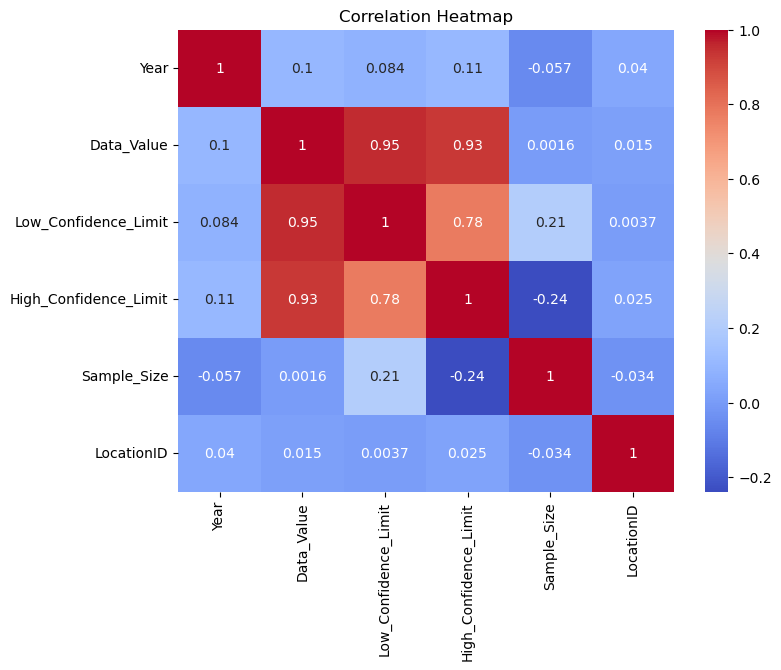

In [28]:
# Correlation Heatmap to see the summary relationship between the features

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
df_cleaned.describe()

,Year,Data_Value,Low_Confidence_Limit,Sample_Size,LocationID
count,88493.000000,88493.000000,88493.000000,88493.000000,88493.000000
mean,2017.023550,30.928268,26.328879,1229.936153,30.579368
std,3.699672,8.172100,8.132068,990.065807,17.475931
min,2011.000000,9.400000,4.400000,50.000000,1.000000
25%,2014.000000,25.800000,20.900000,518.000000,17.000000
50%,2017.000000,31.700000,27.300000,1085.000000,30.000000
75%,2020.000000,36.000000,31.500000,1613.000000,44.000000
max,2023.000000,53.200000,49.500000,4562.000000,78.000000


In [30]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88493 entries, 0 to 104271
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  88493 non-null  int64  
 1   Class                 88493 non-null  object 
 2   Data_Value            88493 non-null  float64
 3   Low_Confidence_Limit  88493 non-null  float64
 4   Sample_Size           88493 non-null  float64
 5   LocationID            88493 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 4.7+ MB


In [31]:
df_cleaned.head(3)

,Year,Class,Data_Value,Low_Confidence_Limit,Sample_Size,LocationID
0,2011,Obesity / Weight Status,23.3,16.1,128.0,2
1,2011,Obesity / Weight Status,35.5,22.7,63.0,2
2,2011,Physical Activity,21.7,19.1,1702.0,2


In [32]:
# Let's see the Distribution of the features 

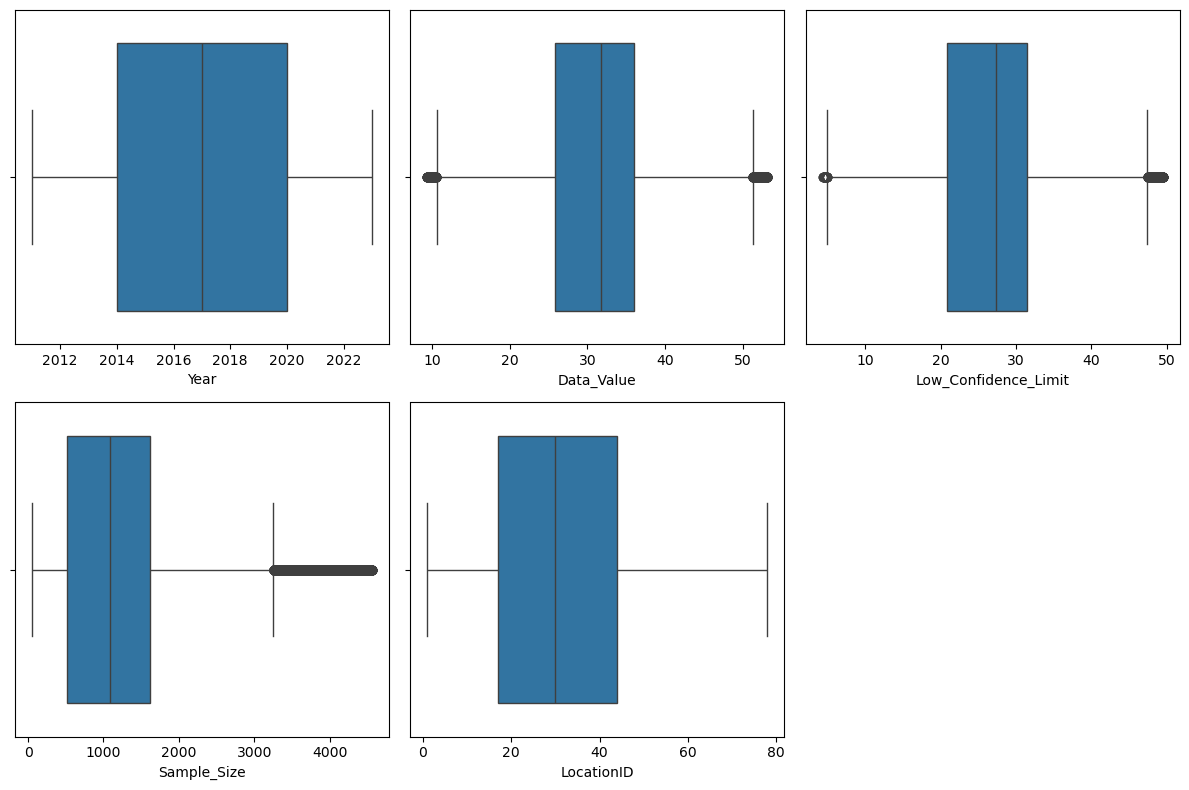

In [33]:
# Visualizing the distribution of df_age
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_columns, 1): # Looping through each numerical feature
    plt.subplot(2, 3, i) # Creating a subplot for each feature, arranged in a 2x3 grid
    sns.boxplot(df_cleaned[feature], orient='h') # boxplot for the features distribution
    
plt.tight_layout() # Adjusting subplots to fit neatly into the figure
plt.show() # Displaying the plot

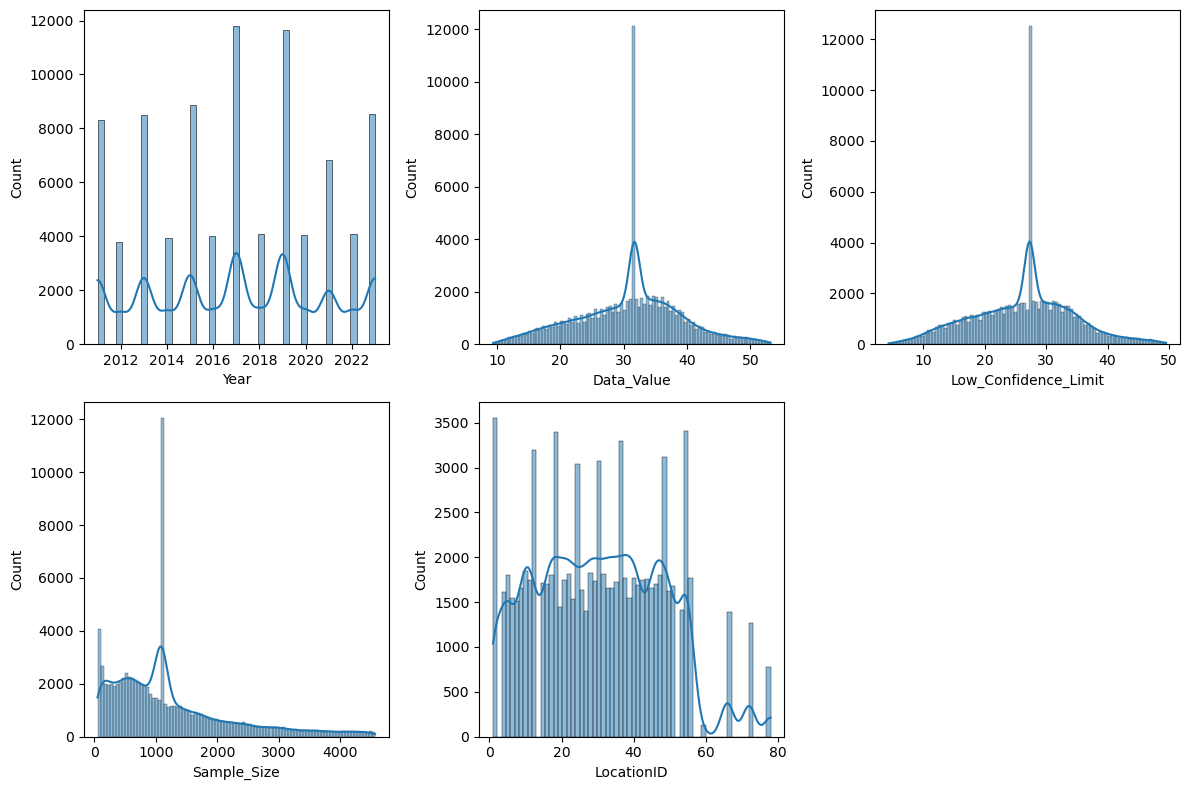

In [34]:
# Visualizing the distribution of df_age

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_columns, 1): # Looping through each numerical feature
    plt.subplot(2, 3, i) # Creating a subplot for each feature, arranged in a 2x3 grid
    sns.histplot(df_cleaned[feature], kde=True) # histplot for the features distribution
    
plt.tight_layout() # Adjusting subplots to fit neatly into the figure
plt.show() # Displaying the plot

In [35]:
df_cleaned.head(3)

,Year,Class,Data_Value,Low_Confidence_Limit,Sample_Size,LocationID
0,2011,Obesity / Weight Status,23.3,16.1,128.0,2
1,2011,Obesity / Weight Status,35.5,22.7,63.0,2
2,2011,Physical Activity,21.7,19.1,1702.0,2


In [36]:
df_cleaned.Class.unique()

array(['Obesity / Weight Status', 'Physical Activity',
       'Fruits and Vegetables'], dtype=object)

In [37]:
# OneHotEncoding

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
##create an instance of Onehotencoder
encoder=OneHotEncoder()

In [40]:
## perform fit and transform
encoded=encoder.fit_transform(df_cleaned[['Class']]).toarray()

In [41]:
encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [42]:
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [43]:
encoder_df.head()

,Class_Fruits and Vegetables,Class_Obesity / Weight Status,Class_Physical Activity
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [44]:
df_encoded = pd.concat([df_cleaned,encoder_df],axis=1)

In [45]:
df_encoded.isna().sum()

Year                             12983
Class                            12983
Data_Value                       12983
Low_Confidence_Limit             12983
Sample_Size                      12983
LocationID                       12983
Class_Fruits and Vegetables      12983
Class_Obesity / Weight Status    12983
Class_Physical Activity          12983
dtype: int64

In [46]:
df_encoded.dropna(inplace=True)

In [47]:
df_encoded.drop(columns = 'Class', inplace=True)

In [48]:
df_encoded.head()

,Year,Data_Value,Low_Confidence_Limit,Sample_Size,LocationID,Class_Fruits and Vegetables,Class_Obesity / Weight Status,Class_Physical Activity
0,2011.0,23.3,16.1,128.0,2.0,0.0,1.0,0.0
1,2011.0,35.5,22.7,63.0,2.0,0.0,1.0,0.0
2,2011.0,21.7,19.1,1702.0,2.0,0.0,0.0,1.0
3,2011.0,29.5,24.5,562.0,2.0,0.0,1.0,0.0
4,2011.0,33.5,26.2,377.0,2.0,0.0,1.0,0.0


In [49]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75510 entries, 0 to 88492
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           75510 non-null  float64
 1   Data_Value                     75510 non-null  float64
 2   Low_Confidence_Limit           75510 non-null  float64
 3   Sample_Size                    75510 non-null  float64
 4   LocationID                     75510 non-null  float64
 5   Class_Fruits and Vegetables    75510 non-null  float64
 6   Class_Obesity / Weight Status  75510 non-null  float64
 7   Class_Physical Activity        75510 non-null  float64
dtypes: float64(8)
memory usage: 5.2 MB


In [50]:
# Seperating the features


X = df_encoded.drop('Data_Value', axis=1) # Dropping the Target variable
y = df_encoded['Data_Value'] # Creating a series of the Target variable 



In [51]:
# Split Train and Test Dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Splitting the data

In [52]:
# Standardizing
from sklearn.preprocessing import StandardScaler

In [53]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [54]:
X_test=scaler.transform(X_test)

In [55]:
# Apply Simple linear regression

from sklearn.linear_model import LinearRegression


# Create Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [56]:
print('Coefficent or slope:', model.coef_)
print('Intercept:', model.intercept_)

Coefficent or slope: [-4.52229479e-03  8.17728392e+00 -1.67635619e+00  8.10663098e-03
 -5.68265359e+12 -9.68635413e+12 -9.91237543e+12]
Intercept: 30.598269638595948


In [57]:
# Make predictions
y_pred = model.predict(X_test)
    
    
# Store the first ten predictions
predictions = y_pred
# predictions = y_pred[:10]

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE MSE, MAE, and R²
mse=mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
    
 # Store the results
metrics = {'MSE':mse, 'RMSE': rmse, 'MAE':mae,  'R²': r2}

In [59]:
metrics

{'MSE': 3.3509831744323213,
 'RMSE': 1.8305690848564884,
 'MAE': 1.2449911266121725,
 'R²': 0.9501043086205175}

In [60]:
prediction_stats = {
            'Mean': np.mean(y_pred),
            'Median': np.median(y_pred),
            'Std Dev': np.std(y_pred),
            'Min': np.min(y_pred),
            'Max': np.max(y_pred),
            'Range': np.max(y_pred) - np.min(y_pred),
        }

In [61]:
prediction_stats

{'Mean': 30.59995671195583,
 'Median': 32.019086645860156,
 'Std Dev': 7.998234564128115,
 'Min': 9.171430395860156,
 'Max': 54.440961645860156,
 'Range': 45.26953125}

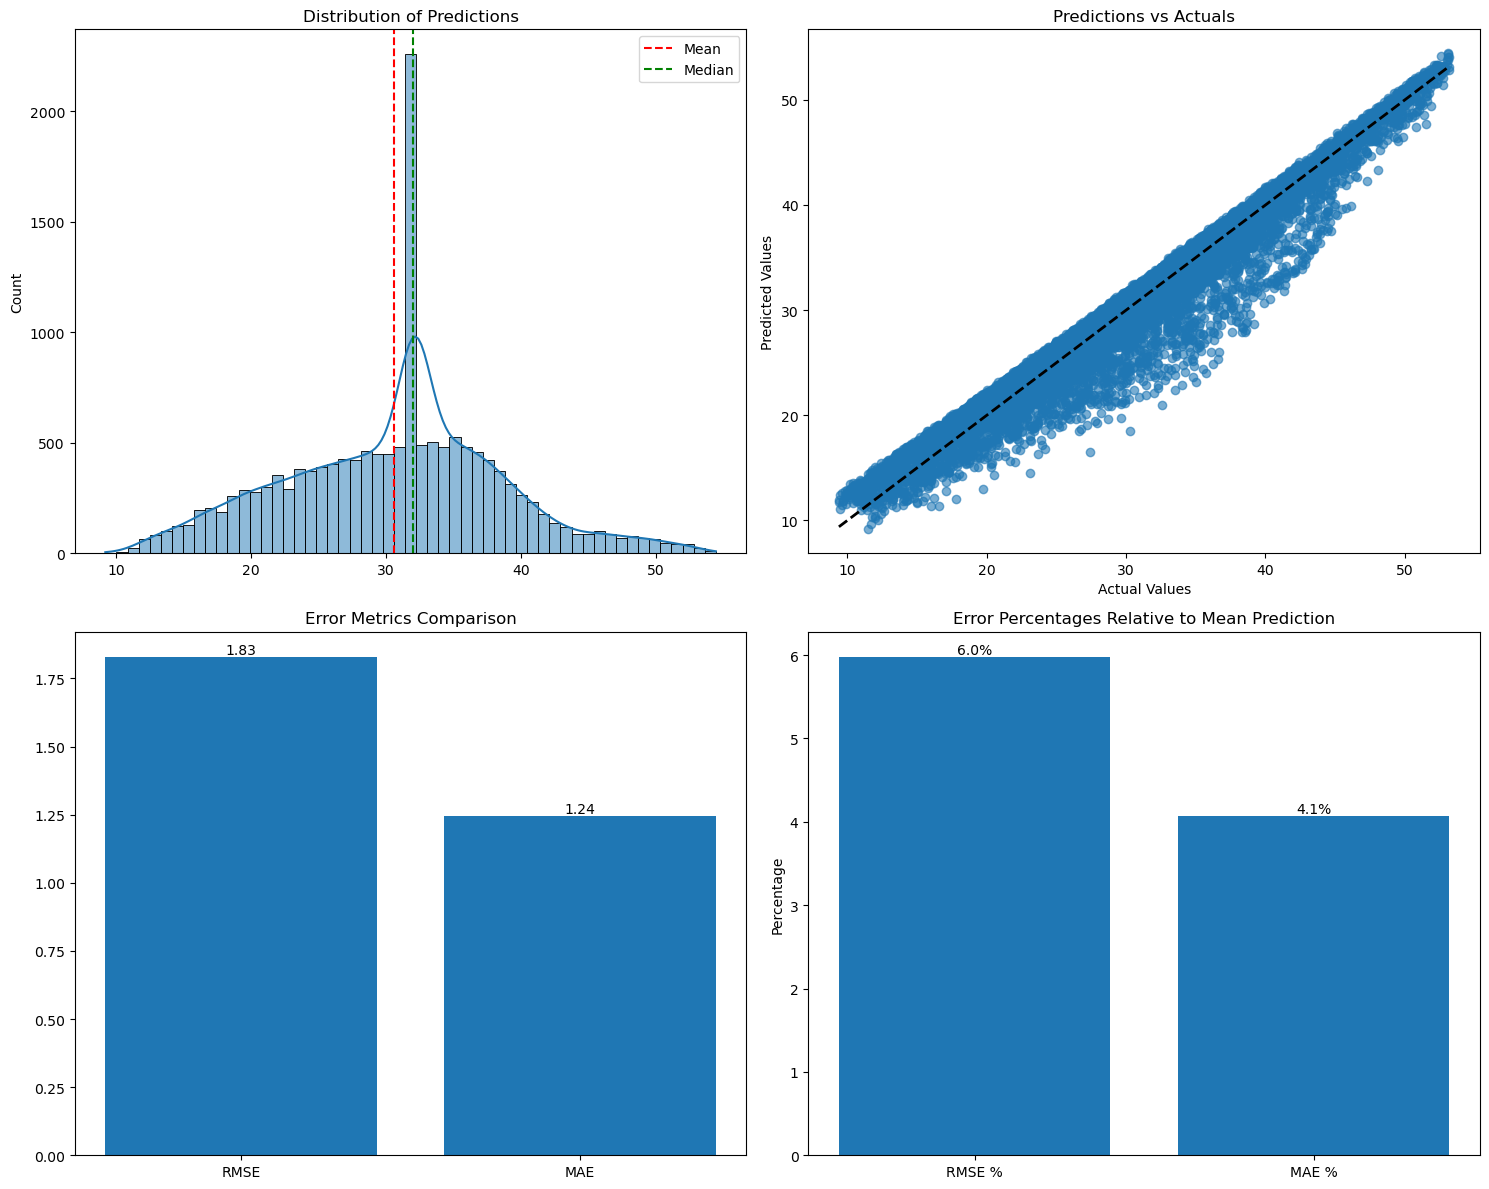

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Distribution of Predictions
sns.histplot(y_pred, kde=True, ax=axes[0, 0])
axes[0, 0].axvline(np.mean(y_pred), color='r', linestyle='--', label='Mean')
axes[0, 0].axvline(np.median(y_pred), color='g', linestyle='--', label='Median')
axes[0, 0].set_title('Distribution of Predictions')
axes[0, 0].legend()


# Plot 2: Predictions vs Actuals
axes[0, 1].scatter(y_test, y_pred, alpha=0.6)
axes[0, 1].plot([y_test.min(), y_test.max()],
                [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0, 1].set_title('Predictions vs Actuals')
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')


# Plot 3: Error Metrics Comparison
metrics_to_plot = ['RMSE', 'MAE']
values_to_plot = [rmse, mae]
axes[1, 0].bar(metrics_to_plot, values_to_plot)
axes[1, 0].set_title('Error Metrics Comparison')
for i, v in enumerate(values_to_plot):
        axes[1, 0].text(i, v, f'{v:.2f}', ha='center', va='bottom')
        
        

# Plot 4: Error Relative to Prediction Scale
mean_pred = np.mean(y_pred)
error_percentages = {
        'RMSE %': (rmse / mean_pred) * 100,
        'MAE %': (mae / mean_pred) * 100
        }
axes[1, 1].bar(error_percentages.keys(), error_percentages.values())
axes[1, 1].set_title('Error Percentages Relative to Mean Prediction')
axes[1, 1].set_ylabel('Percentage')
for i, (k, v) in enumerate(error_percentages.items()):
    axes[1, 1].text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()

plt.savefig('model_performance.jpg', dpi=300, bbox_inches='tight')

plt.show()

Distribution of Predictions: Predictions are normally distributed, with the mean and median closely aligned, indicating no skew.

Predictions vs. Actuals: Most predictions align closely with actual values, showing high accuracy.

Error Metrics:

RMSE: 1.83
MAE: 1.24

Both are low, indicating small prediction errors.
Error Percentages: RMSE is 6.0%, and MAE is 4.1% of the mean prediction value, showing strong model performance.

Conclusion: The model performs well, with minimal errors and accurate predictions.